In [4]:
import pandas as pd
import numpy as np

In [36]:
df = pd.read_csv('dataquery.csv', index_col=0)
# Standarizing names of dataframe columns 
# id refers to the id of the company and data refers to the income
df.columns = ['date', 'id', 'data']
df

,date,id,data
0,2021-11-15,1,1.165129e+06
1,2021-11-15,6,2.150826e+05
2,2021-11-15,2,1.272147e+06
3,2021-11-15,4,2.581829e+04
4,2021-11-15,3,2.034338e+05
...,...,...,...
8604,2024-11-02,1,1.101201e+06
8605,2024-11-02,5,3.831494e+04
8606,2024-11-02,6,1.478103e+05
8607,2024-11-02,3,8.760099e+04


In [37]:
pivot_df = df.pivot(index='date', columns='id', values='data')
pivot_df.columns = [f'company_{col}' for col in pivot_df.columns]
pivot_df.reset_index(inplace=True)
pivot_df

,date,company_1,company_2,company_3,company_4,company_5,company_6
0,2020-11-01,9.002395e+05,NaN,2.740852e+04,NaN,NaN,NaN
1,2020-11-02,7.580464e+05,NaN,1.102843e+05,NaN,NaN,NaN
2,2020-11-03,7.018318e+05,NaN,1.185705e+05,NaN,NaN,NaN
3,2020-11-04,5.149224e+05,NaN,1.210628e+05,NaN,NaN,NaN
4,2020-11-05,7.544703e+05,NaN,1.639952e+05,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1516,2024-12-27,2.200914e+06,2.594027e+06,1.213341e+06,6978.373338,50096.2245,653910.662472
1517,2024-12-28,2.312137e+06,2.603804e+06,1.103839e+06,6675.982785,35172.2700,665208.517454
1518,2024-12-29,2.174856e+06,2.783804e+06,1.272284e+06,6604.603972,32966.6400,587478.563432
1519,2024-12-30,2.713556e+06,2.780263e+06,1.378832e+06,6360.479553,32294.2095,660170.179135


In [38]:
pivot_df.isna().sum()

date           0
company_1      0
company_2     30
company_3      8
company_4    179
company_5    123
company_6    177
dtype: int64

In [39]:
def fill_missing_dates(dataframe):
    dataframe['date'] = pd.to_datetime(dataframe['date'])

    # Set 'date' as the index
    dataframe.set_index('date', inplace=True)

    # Create a complete date range from the min date to the max date in the DataFrame
    complete_date_range = pd.date_range(start=dataframe.index.min(), end=dataframe.index.max(), freq='D')

    # Reindex the DataFrame to the complete date range
    dataframe = dataframe.reindex(complete_date_range)

    # Fill missing values with zeros
    dataframe.fillna(np.nan, inplace=True)

    # Reset the index to bring 'date' back as a column
    dataframe.reset_index(inplace=True)
    dataframe.rename(columns={'index': 'date'}, inplace=True)

    return dataframe

In [40]:
complete_dates = fill_missing_dates(pivot_df)
complete_dates

,date,company_1,company_2,company_3,company_4,company_5,company_6
0,2020-11-01,9.002395e+05,NaN,2.740852e+04,NaN,NaN,NaN
1,2020-11-02,7.580464e+05,NaN,1.102843e+05,NaN,NaN,NaN
2,2020-11-03,7.018318e+05,NaN,1.185705e+05,NaN,NaN,NaN
3,2020-11-04,5.149224e+05,NaN,1.210628e+05,NaN,NaN,NaN
4,2020-11-05,7.544703e+05,NaN,1.639952e+05,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1517,2024-12-27,2.200914e+06,2.594027e+06,1.213341e+06,6978.373338,50096.2245,653910.662472
1518,2024-12-28,2.312137e+06,2.603804e+06,1.103839e+06,6675.982785,35172.2700,665208.517454
1519,2024-12-29,2.174856e+06,2.783804e+06,1.272284e+06,6604.603972,32966.6400,587478.563432
1520,2024-12-30,2.713556e+06,2.780263e+06,1.378832e+06,6360.479553,32294.2095,660170.179135


In [41]:
complete_dates.isna().sum()

date           0
company_1      1
company_2     31
company_3      9
company_4    180
company_5    124
company_6    178
dtype: int64

In [71]:
import pandas as pd
def count_consecutive_nulls(df, date_column):
    """
    Count the lengths of consecutive null values for each column in a DataFrame.
    
    Parameters:
    df (pd.DataFrame): DataFrame containing the date column.
    date_column (str): Name of the column containing the dates.
    
    Returns:
    dict: Dictionary with column names as keys and lists of lengths of consecutive nulls as values.
    """
    def consecutive_nulls(series):
        # Get a boolean mask where True represents null values
        is_null = series.isnull()
        # Identify the start of each sequence of null values
        group = (is_null != is_null.shift()).cumsum()
        # Group by these sequences and count the lengths of null sequences
        null_lengths = is_null.groupby(group).sum()
        # Filter out the zero-length sequences
        return null_lengths[null_lengths > 0].tolist()

    # Ensure the date column is in datetime format
    df[date_column] = pd.to_datetime(df[date_column])
    
    # Initialize a dictionary to hold the results
    null_periods = {}
    
    # Iterate through each column (excluding the date column)
    for column in df.columns:
        if column != date_column:
            null_periods[column] = consecutive_nulls(df[column])
    
    return null_periods

complete_df.reset_index(inplace=True)
result = count_consecutive_nulls(complete_df, 'index')
print(result)

{'Empresa_1': [], 'Empresa_2': [30], 'Empresa_3': [], 'Empresa_4': [120], 'Empresa_5': [92], 'Empresa_6': [119]}


In [14]:

df = pd.read_sql("SELECT Fecha_hoy, ID_empresa, SUM(GREATEST(ing_hab, 0)) AS ing_hab FROM Ocupaciones GROUP BY Fecha_hoy, ID_empresa;", conn)

pivot_df = df.pivot(index='Fecha_hoy', columns='ID_empresa', values='ing_hab')
pivot_df.columns = [f'Empresa_{col}' for col in pivot_df.columns]
pivot_df.reset_index(inplace=True)

complete_df = fill_missing_dates(pivot_df, 'Fecha_hoy')

df_week = complete_df.resample('W').sum()
'''


NameError: name 'complete_df' is not defined

In [66]:
complete_df

,level_0,index,Empresa_1,Empresa_2,Empresa_3,Empresa_4,Empresa_5,Empresa_6
0,0,2020-11-01,9.002395e+05,NaN,2.740852e+04,NaN,NaN,NaN
1,1,2020-11-02,7.580464e+05,NaN,1.102843e+05,NaN,NaN,NaN
2,2,2020-11-03,7.018318e+05,NaN,1.185705e+05,NaN,NaN,NaN
3,3,2020-11-04,5.149224e+05,NaN,1.210628e+05,NaN,NaN,NaN
4,4,2020-11-05,7.544703e+05,NaN,1.639952e+05,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
1517,1517,2024-12-27,2.200914e+06,2.594027e+06,1.213341e+06,6978.373338,50096.2245,653910.662472
1518,1518,2024-12-28,2.312137e+06,2.603804e+06,1.103839e+06,6675.982785,35172.2700,665208.517454
1519,1519,2024-12-29,2.174856e+06,2.783804e+06,1.272284e+06,6604.603972,32966.6400,587478.563432
1520,1520,2024-12-30,2.713556e+06,2.780263e+06,1.378832e+06,6360.479553,32294.2095,660170.179135


In [62]:
complete_df.iloc[120]['Fecha_hoy']+ pd.DateOffset(years=5) in complete_df['Fecha_hoy']

False

In [60]:
complete_df.iloc[120]['Fecha_hoy']+ pd.DateOffset(years=5)

Timestamp('2026-03-01 00:00:00')

In [39]:
import pandas as pd

def fill_missing_dates(df, date_column):
    """
    Fill missing dates in a DataFrame with null values for all columns.
    
    Parameters:
    df (pd.DataFrame): DataFrame containing the date column.
    date_column (str): Name of the column containing the dates.
    
    Returns:
    pd.DataFrame: DataFrame with missing dates filled with null values.
    """
    # Ensure the date column is in datetime format
    df[date_column] = pd.to_datetime(df[date_column])
    
    # Set the date column as the index
    df.set_index(date_column, inplace=True)
    
    # Create a complete date range from the min to the max date in the DataFrame
    complete_date_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq='D')
    
    # Reindex the DataFrame to this complete date range
    df_reindexed = df.reindex(complete_date_range)
    
    # Rename the index back to the original date column name
    df_reindexed.index.name = date_column
    
    # Reset index to convert the date index back to a column
    df_reindexed.reset_index(inplace=True)
    
    return df_reindexed

# Example usage:
data = {
    'date': ['2024-01-01', '2024-01-02', '2024-01-04'],  # Example with a missing date (2024-01-03)
    'value': [10, 20, 30]
}
df = pd.DataFrame(data)
filled_df = fill_missing_dates(df, 'date')
print(filled_df)


        date  value
0 2024-01-01   10.0
1 2024-01-02   20.0
2 2024-01-03    NaN
3 2024-01-04   30.0


In [ ]:
def treat_anomalies():
    '''
    This function treats the anomalies on the revenue time series.
    Any value that's higher than 
    '''


In [37]:
import numpy as np

np.mean(pivot_df['Empresa_1'])

1167284.8845443772

In [35]:
pivot_df.iloc[124]

Fecha_hoy    2021-03-05 00:00:00
Empresa_1          943930.692698
Empresa_2          679354.767679
Empresa_3                    0.0
Empresa_4            2791.684376
Empresa_5              3477.1695
Empresa_6          180767.550151
Name: 124, dtype: object

In [2]:
df = pd.read_csv('D:/erick/retoTCA/data/Ocupaciones1.csv')

In [5]:
from datetime import datetime
registros = []
date_format = "%Y-%m-%d %H:%M:%S.%f"
for index, row in df.iterrows():
  row[0] = datetime.strptime(row[0], date_format)
  registros.append(tuple(row))
  print(index)
  if index == 5:
    break

C:\Users\erick\AppData\Local\Temp\ipykernel_9580\1504037096.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  row[0] = datetime.strptime(row[0], date_format)


0
1
2
3
4
5


C:\Users\erick\AppData\Local\Temp\ipykernel_9580\1504037096.py:5: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  row[0] = datetime.strptime(row[0], date_format)


In [10]:
iteracionesDF = df.iterrows()

In [9]:
registros = []
date_format = "%Y-%m-%d %H:%M:%S.%f"
inicio, final = 5, 10000
for index, row in df.iterrows():
  if index > inicio:
    row[0] = datetime.strptime(row[0], date_format)
    registros.append(tuple(row))
    print(index)
    if index == final:
        break

C:\Users\erick\AppData\Local\Temp\ipykernel_9580\1074691066.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  row[0] = datetime.strptime(row[0], date_format)
C:\Users\erick\AppData\Local\Temp\ipykernel_9580\1074691066.py:6: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  row[0] = datetime.strptime(row[0], date_format)


6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
28

In [172]:
df.shape

(3405916, 23)

In [12]:
columns = ", ".join(df.columns)
values = ", ".join(["%s"] * len(df.columns))
insert_query = f"INSERT INTO Ocupaciones ({columns}) VALUES ({values})"

In [192]:
import mysql.connector
import pandas as pd

DB_HOST = 'predidm.mysql.database.azure.com'
DB_USER = 'adminserver'
DB_PASSWORD = 'contraSeguraxd!0'
DB_NAME = 'pronosticotca'

conn = mysql.connector.connect(
    host = DB_HOST,
    user = DB_USER,
    password = DB_PASSWORD,
    database = DB_NAME,
    port = 3306,
    client_flags = [mysql.connector.ClientFlag.SSL],
    ssl_ca =  'D:/erick/retoTCA/certificados/DigiCertGlobalRootG2.crt.pem'
)


df = pd.read_sql("SELECT * FROM Ocupaciones", conn)

#cursor.executemany(insert_query, registros)

#conn.commit()
#conn.close()

C:\Users\erick\AppData\Local\Temp\ipykernel_9580\1323705399.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT * FROM Ocupaciones", conn)


In [196]:
df.columns

Index(['Fecha_hoy', 'ID_Entidad_Fed', 'ID_Agencia', 'ID_Tipo_Habitacion',
       'ID_canal', 'ID_Programa', 'ID_Paquete', 'ing_hab', 'ADR',
       'cto_ing_res', 'ID_empresa', 'ID_edificio', 'num_adu', 'TREVPEC',
       'num_men', 'num_meg', 'num_inf', 'num_jun', 'ID_Segmento_Mercado',
       'ID_Segmento_Alterno', 'ID_Segmento_Comp', 'moneda_cve', 'ID_Empresa2'],
      dtype='object')

In [3]:
df = pd.read_csv('C:/Users/Public/Documents/Ocupaciones.csv')

In [4]:
df.shape

(3405916, 56)

In [5]:
df.head()

,Fecha_hoy,ID_Entidad_Fed,ID_Agencia,ID_Tipo_Habitacion,ID_canal,ID_Programa,ID_Paquete,ing_hab,aa_ing_hab,ing_hab_nocoruso,...,num_men_nocoruso,aa_num_men_nocoruso,num_meg,num_inf,num_jun,ID_Segmento_Mercado,ID_Segmento_Alterno,ID_Segmento_Comp,moneda_cve,ID_Empresa2
0,2021-11-15 00:00:00.000,173,305,13,1,1,1,0.0,0.000000,0.0,...,0,0,0,0,0,6,17,34,2,7
1,2021-11-15 00:00:00.000,173,305,14,0,1,1,0.0,57.086842,0.0,...,0,0,0,0,0,6,17,34,2,7
2,2021-11-15 00:00:00.000,173,305,14,1,1,1,0.0,0.000000,0.0,...,0,0,0,0,0,6,17,34,1,7
3,2021-11-15 00:00:00.000,173,305,14,1,1,1,0.0,0.000000,0.0,...,0,0,0,0,0,6,17,34,2,7
4,2021-11-15 00:00:00.000,173,305,19,3,1,1,0.0,774.750978,0.0,...,0,0,0,0,0,6,17,34,2,7


In [6]:
df.columns

Index(['Fecha_hoy', 'ID_Entidad_Fed', 'ID_Agencia', 'ID_Tipo_Habitacion',
       'ID_canal', 'ID_Programa', 'ID_Paquete', 'ing_hab', 'aa_ing_hab',
       'ing_hab_nocoruso', 'aa_ing_hab_nocoruso', 'ing_hab_uso',
       'aa_ing_hab_uso', 'ing_hab_cor', 'aa_ing_hab_cor',
       'ing_hab_intercambios', 'aa_ing_hab_intercambios', 'cto_noc',
       'aa_cto_noc', 'cto_noc_nocoruso', 'aa_cto_noc_nocoruso', 'cto_noc_uso',
       'aa_cto_noc_uso', 'cto_noc_cor', 'aa_cto_noc_cor', 'ADR', 'aa_ADR',
       'otr_ing', 'aa_otr_ing', 'cto_ing_res', 'cto_age', 'cto_est',
       'ing_extras', 'ing_impuestos', 'ing_base', 'ing_exento', 'ID_empresa',
       'ID_edificio', 'num_adu', 'aa_num_adu', 'num_adu_nocoruso',
       'aa_num_adu_nocoruso', 'TREVPEC', 'aa_TREVPEC', 'num_men', 'aa_num_men',
       'num_men_nocoruso', 'aa_num_men_nocoruso', 'num_meg', 'num_inf',
       'num_jun', 'ID_Segmento_Mercado', 'ID_Segmento_Alterno',
       'ID_Segmento_Comp', 'moneda_cve', 'ID_Empresa2'],
      dtype='object'

In [7]:
df['ID_empresa'].unique()

array([1, 6, 2, 4, 3, 5], dtype=int64)

In [8]:
df['ID_Segmento_Mercado'].unique()

array([6, 3, 7, 1, 5, 4, 2], dtype=int64)

In [9]:
df_ingresos = df[['Fecha_hoy', 'ID_empresa', 'ing_hab']].copy()

In [10]:
ingSum = df_ingresos.groupby(['Fecha_hoy','ID_empresa']).sum()

In [11]:
ingSum

ing_hab
Fecha_hoy               ID_empresa              
2020-11-01 00:00:00.000 1           9.002395e+05
                        3           2.740852e+04
2020-11-02 00:00:00.000 1           7.579742e+05
                        3           1.102843e+05
2020-11-03 00:00:00.000 1           7.018318e+05
...                                          ...
2024-12-31 00:00:00.000 2           2.807830e+06
                        3           1.485472e+06
                        4           7.300983e+03
                        5           3.990432e+04
                        6           7.803301e+05

[8609 rows x 1 columns]

In [14]:
df_id_1 = ingSum.xs(1, level='ID_empresa')

df_id_1_reset = df_id_1.reset_index()

In [15]:
df_id_1_reset

,Fecha_hoy,ing_hab
0,2020-11-01 00:00:00.000,9.002395e+05
1,2020-11-02 00:00:00.000,7.579742e+05
2,2020-11-03 00:00:00.000,7.018318e+05
3,2020-11-04 00:00:00.000,5.149224e+05
4,2020-11-05 00:00:00.000,7.544703e+05
...,...,...
1516,2024-12-27 00:00:00.000,2.200914e+06
1517,2024-12-28 00:00:00.000,2.312137e+06
1518,2024-12-29 00:00:00.000,2.168915e+06
1519,2024-12-30 00:00:00.000,2.703956e+06


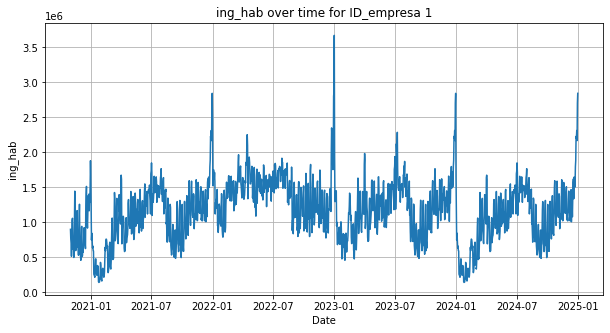

In [18]:
import matplotlib.pyplot as plt

df_id_1_reset['Fecha_hoy'] = pd.to_datetime(df_id_1_reset['Fecha_hoy'])

date_range = pd.date_range(start=df_id_1_reset['Fecha_hoy'].min(), 
                           end=df_id_1_reset['Fecha_hoy'].max())

df_id_1_full = df_id_1_reset.set_index('Fecha_hoy').reindex(date_range).rename_axis('Fecha_hoy').reset_index()

plt.figure(figsize=(10, 5))
plt.plot(df_id_1_full['Fecha_hoy'], df_id_1_full['ing_hab'])
plt.title('ing_hab over time for ID_empresa 1')
plt.xlabel('Date')
plt.ylabel('ing_hab')
plt.grid(True)
plt.show()


In [23]:
df_id_1_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1522 entries, 0 to 1521
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Fecha_hoy  1522 non-null   datetime64[ns]
 1   ing_hab    1521 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 23.9 KB


In [12]:
empresa1 = ingSum.query("ID_empresa == 1")

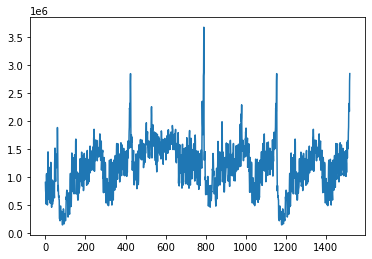

In [13]:
import matplotlib.pyplot as plt

plt.plot(list(empresa1['ing_hab']))
plt.show()